In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
columns = ['Artist Name', 'Song Title', 'Album Title', 'Pageviews', 'Release Date', 'Featured Artists', 'Artist Popularity', 'Genre(s)', 'Followers', 'Danceability', 'Energy', 'Valence', 'Duration (MS)', 'Loudness', 'Total Words', 'Lyrics'] 
lyrics_df = pd.read_csv("lyricDataset.csv",names = columns)

In [3]:
# Release Date is an object due to "-"
# Everything is good on the data types
lyrics_df.dtypes

Artist Name           object
Song Title            object
Album Title           object
Pageviews              int64
Release Date          object
Featured Artists       int64
Artist Popularity      int64
Genre(s)              object
Followers              int64
Danceability         float64
Energy               float64
Valence              float64
Duration (MS)          int64
Loudness             float64
Total Words            int64
Lyrics                object
dtype: object

In [4]:
lyrics_df

,Artist Name,Song Title,Album Title,Pageviews,Release Date,Featured Artists,Artist Popularity,Genre(s),Followers,Danceability,Energy,Valence,Duration (MS),Loudness,Total Words,Lyrics
0,Miranda Lambert,Vice,The Weight of These Wings,42261,2016-07-18,0,74,contemporary country / country / country dawn ...,2184569,0.568,0.562,0.247,240280,-7.775,233,Sting of the needle dropping on a vinyl\nNeon ...
1,Miranda Lambert,Tin Man,The Weight of These Wings,40702,2016-11-18,0,74,contemporary country / country / country dawn ...,2184569,0.425,0.372,0.292,259280,-10.920,147,Hey there Mr. Tin Man\nYou don't know how luck...
2,Miranda Lambert,Little Red Wagon,Platinum,29992,2014-06-03,0,74,contemporary country / country / country dawn ...,2184569,0.584,0.813,0.774,204387,-7.221,255,You only love me for my big sunglasses\nAnd my...
3,Miranda Lambert,Mama’s Broken Heart,Four the Record,29986,2013-01-14,0,74,contemporary country / country / country dawn ...,2184569,0.768,0.809,0.748,177773,-4.204,315,I cut my bangs with some rusty kitchen scissor...
4,Miranda Lambert,Somethin’ Bad,Platinum,26966,2014-05-19,1,74,contemporary country / country / country dawn ...,2184569,0.777,0.245,0.349,109107,-14.266,307,Stand on the bar stomp your feet start clapp...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,The Pharcyde,Bullshit,Labcabincalifornia,6382,1995-11-14,0,64,alternative hip hop / hardcore hip hop / hip h...,352273,0.722,0.587,0.813,253133,-7.893,607,You gotta get on up off of that bullshit stop...
1576,The Pharcyde,Groupie Therapy,Labcabincalifornia,0,1995-11-14,0,64,alternative hip hop / hardcore hip hop / hip h...,352273,0.650,0.591,0.289,312667,-8.913,645,I was standing one of the cast of many\nI wou...
1577,The Pharcyde,Devil Music,Labcabincalifornia,0,1995-11-14,0,64,alternative hip hop / hardcore hip hop / hip h...,352273,0.883,0.544,0.574,252840,-9.452,435,The way that momma raised us was pure faith\nS...
1578,The Pharcyde,Moment In Time,Labcabincalifornia,0,1995-11-14,0,64,alternative hip hop / hardcore hip hop / hip h...,352273,0.823,0.475,0.520,164067,-11.229,242,(yo yo yo)\nIf you're listening (x3)\n(yo y...


In [5]:
null_columns = lyrics_df.columns[lyrics_df.isnull().any()]
lyrics_df[null_columns].isnull().sum()

Album Title     21
Release Date    87
Genre(s)        20
Lyrics           1
dtype: int64

In [6]:
lyrics_df["Lyrics"].isnull().sum()

1

In [7]:
lyrics_df[lyrics_df["Lyrics"].isnull()]

,Artist Name,Song Title,Album Title,Pageviews,Release Date,Featured Artists,Artist Popularity,Genre(s),Followers,Danceability,Energy,Valence,Duration (MS),Loudness,Total Words,Lyrics
32,In Hearts Wake,Ark,Ark,0,2017-04-24,0,50,australian metalcore / melodic metalcore / met...,88252,0.339,0.415,0.204,70002,-16.547,0,NaN


In [8]:
lyrics_df["Genre(s)"].isnull().sum()

20

In [9]:
lyrics_df[lyrics_df["Genre(s)"].isnull()]

,Artist Name,Song Title,Album Title,Pageviews,Release Date,Featured Artists,Artist Popularity,Genre(s),Followers,Danceability,Energy,Valence,Duration (MS),Loudness,Total Words,Lyrics
1160,Gavlyn,What I Do,From the Art,53005,2009-01-01,0,43,NaN,33583,0.494,0.858,0.335,190068,-3.965,401,Yeah\nOh - man it's like...\nIt's beautiful h...
1161,Gavlyn,Why Don’t You Do Right,From the Art,11409,2012-10-02,0,43,NaN,33583,0.649,0.810,0.284,175570,-7.885,341,Why don't you do right?\nLike some other men d...
1162,Gavlyn,Guilty Pleasure,Modest Confidence,8157,2013-10-14,0,43,NaN,33583,0.374,0.814,0.628,200830,-5.763,442,A culture shock to put it in words\nYou might...
1163,Gavlyn,We On,Headspace,6039,2017-01-20,0,43,NaN,33583,0.478,0.606,0.259,187774,-6.865,514,Ayo we on peace to those that say we not\nAyo...
1164,Gavlyn,All Too Well,Modest Confidence,0,2014-01-17,0,43,NaN,33583,0.577,0.807,0.349,196599,-4.776,411,Alright\nYeah yeah yeah\nQuick to say the ob...
1165,Gavlyn,Clarity/To the Feeling,From the Art,0,2012-10-02,0,43,NaN,33583,0.478,0.944,0.694,153836,-5.335,596,Clarity/To the Feeling\nYeah from the art\nGa...
1166,Gavlyn,Needs,Headspace,0,2017-08-08,0,43,NaN,33583,0.774,0.663,0.281,196805,-5.271,351,How can I focus on your whereabouts\nWhen I'm ...
1167,Gavlyn,Clarity,From the Art,0,2012-10-02,0,43,NaN,33583,0.713,0.677,0.786,192811,-5.252,474,Ugh yea\nFrom the art\nGavlyn\nAnd it's that ...
1168,Gavlyn,Looking Back,Headspace,0,2018-03-05,2,43,NaN,33583,0.521,0.738,0.534,279614,-5.135,802,Hey yo what's up Vel and Rev man\nIt's been a...
1169,Gavlyn,Staring Problem,From the Art,0,2012-10-02,0,43,NaN,33583,0.699,0.929,0.667,188945,-4.057,474,Damn man\nWhat the fuck are you looking at?\nY...


In [10]:
# Gavlyn , the artist, doesn't have a music genre from the lyrics data.
# Gavlyn is a female hip hop / rap artist from Los Angeles ; source : Google
# insert hip hop in the Genre(s) in Gavlyn rows in Genre(s) columns

lyrics_df[lyrics_df['Genre(s)'].isnull()]
lyrics_df['Genre(s)'].fillna("hip hop", inplace = True) 

In [11]:
lyrics_df["Genre(s)"].isnull().sum()

0

In [12]:
lyrics_df["Duration (MS)"].isnull().sum()

0

In [13]:
genres_list = lyrics_df["Genre(s)"]
duration_list = lyrics_df["Duration (MS)"]

In [14]:
# series
#pd.set_option('display.max_rows',None)
genres_list

0       contemporary country / country / country dawn ...
1       contemporary country / country / country dawn ...
2       contemporary country / country / country dawn ...
3       contemporary country / country / country dawn ...
4       contemporary country / country / country dawn ...
                              ...                        
1575    alternative hip hop / hardcore hip hop / hip h...
1576    alternative hip hop / hardcore hip hop / hip h...
1577    alternative hip hop / hardcore hip hop / hip h...
1578    alternative hip hop / hardcore hip hop / hip h...
1579    alternative hip hop / hardcore hip hop / hip h...
Name: Genre(s), Length: 1580, dtype: object

In [15]:
genres_list = genres_list.to_frame()

In [16]:
type(genres_list)

pandas.core.frame.DataFrame

In [17]:
# series
duration_list

0       240280
1       259280
2       204387
3       177773
4       109107
         ...  
1575    253133
1576    312667
1577    252840
1578    164067
1579    202147
Name: Duration (MS), Length: 1580, dtype: int64

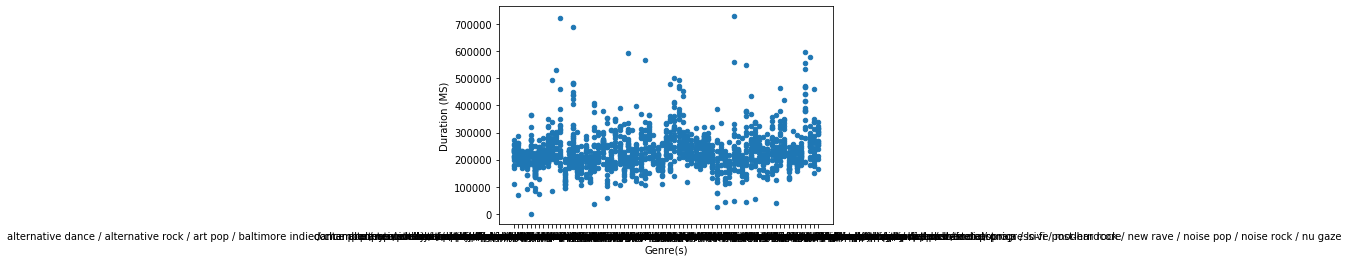

In [18]:
lyrics_df.plot.scatter(x="Genre(s)", y="Duration (MS)")